In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
# ---
# 1. Introduction & Use Case
# ---

# Mode Imputation for Outliers
#
# When to use:
# This technique is most suitable for categorical features (or discrete numerical features with a limited number of values).
# Outliers in this context are typically categories that occur with very low frequency. These might be data entry errors
# or simply rare events that you want to group into a more common category to prevent a model from overfitting to them.
#
# Data Requirements:
# - The data should be categorical or discrete.
# - It's not recommended for continuous numerical data, where replacing an outlier with the mode could
#   significantly distort the distribution. For numerical data, consider techniques like clipping, log transformation,
#   or imputing with the mean/median.



In [3]:
# ---
# 2. Load Sample Data
# ---
print("Loading the Ames Housing dataset...")
# We'll use the Ames Housing dataset, which contains various categorical and numerical features.
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
print("Dataset loaded successfully.")
print("-" * 30)




Loading the Ames Housing dataset...
Dataset loaded successfully.
------------------------------


In [4]:
# ---
# 3. Select a Feature
# ---

# We will work with the 'MSZoning' feature, which describes the general zoning classification of the sale.
# Let's first inspect the frequency of each category.
feature_name = 'MSZoning'
print(f"Original value counts for the '{feature_name}' feature:")
print(df[feature_name].value_counts())
print("-" * 30)




Original value counts for the 'MSZoning' feature:
MSZoning
RL           1151
RM            218
FV             65
RH             16
'C (all)'      10
Name: count, dtype: int64
------------------------------


In [5]:
# ---
# 4. Identify and Impute Outliers
# ---

# For categorical data, we can define outliers as categories with a very low frequency.
# Let's identify categories that appear in less than 1% of the rows as outliers.

# Create a copy of the original column to store the transformed data
transformed_feature_name = f"{feature_name}_mode_imputed"
df[transformed_feature_name] = df[feature_name]

# Calculate the mode (most frequent category)
mode_value = df[transformed_feature_name].mode()[0]
print(f"The mode for '{feature_name}' is: '{mode_value}'")

# Calculate the frequency of each category
value_counts = df[transformed_feature_name].value_counts()
total_rows = len(df)

# Identify infrequent categories (our "outliers")
# We'll set a threshold of 1%
threshold = 0.01
outlier_categories = value_counts[value_counts / total_rows < threshold].index.tolist()

print(f"Categories identified as outliers (less than {threshold*100}% frequency): {outlier_categories}")
print("-" * 30)




The mode for 'MSZoning' is: 'RL'
Categories identified as outliers (less than 1.0% frequency): ["'C (all)'"]
------------------------------


In [6]:
# Create a DataFrame to store the identified outlier rows before we change them
outlier_indices = df[transformed_feature_name].isin(outlier_categories)
outlier_df = df[outlier_indices].copy()

# Add a column to show the original value, which we are treating as the "outlier score"
outlier_df['outlier_category'] = outlier_df[transformed_feature_name]


# Apply mode imputation
# We replace the outlier categories with the mode value.
df.loc[outlier_indices, transformed_feature_name] = mode_value




In [7]:
# ---
# 5. Show the Results
# ---

print("Head of the DataFrame with the new imputed column:")
print(df[[feature_name, transformed_feature_name]].head())
print("-" * 30)

print(f"Value counts for '{transformed_feature_name}' after mode imputation:")
print(df[transformed_feature_name].value_counts())
print("-" * 30)

print("DataFrame containing only the rows identified as outliers (before imputation):")
# Displaying only the relevant columns for clarity
print(outlier_df[[feature_name, 'outlier_category']].head())
print(f"\nTotal outlier rows found: {len(outlier_df)}")
print("-" * 30)




Head of the DataFrame with the new imputed column:
  MSZoning MSZoning_mode_imputed
0       RL                    RL
1       RL                    RL
2       RL                    RL
3       RL                    RL
4       RL                    RL
------------------------------
Value counts for 'MSZoning_mode_imputed' after mode imputation:
MSZoning_mode_imputed
RL    1161
RM     218
FV      65
RH      16
Name: count, dtype: int64
------------------------------
DataFrame containing only the rows identified as outliers (before imputation):
      MSZoning outlier_category
30   'C (all)'        'C (all)'
88   'C (all)'        'C (all)'
93   'C (all)'        'C (all)'
495  'C (all)'        'C (all)'
557  'C (all)'        'C (all)'

Total outlier rows found: 10
------------------------------


Generating before-and-after visualization...


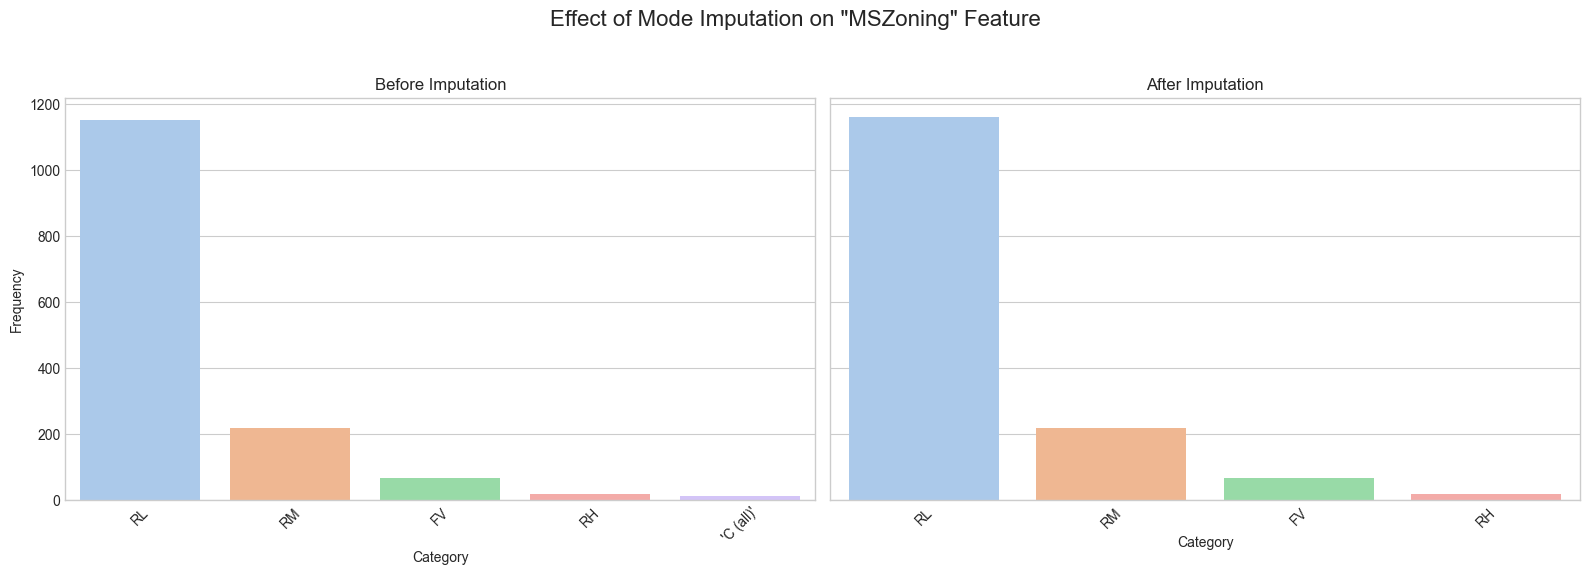


Visualization complete. Notice how the rare categorie 'C (all)' is gone,
and their counts have been added to the mode category 'RL'.


In [8]:
print("Generating before-and-after visualization...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle(f'Effect of Mode Imputation on "{feature_name}" Feature', fontsize=16)

# Before
# Using barplot and explicitly setting 'hue' to prevent FutureWarning
counts_before = df[feature_name].value_counts()
sns.barplot(ax=axes[0], x=counts_before.index, y=counts_before.values, palette='pastel', hue=counts_before.index, legend=False)
axes[0].set_title('Before Imputation')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# After
# Using barplot and explicitly setting 'hue' to prevent FutureWarning
counts_after = df[transformed_feature_name].value_counts()
sns.barplot(ax=axes[1], x=counts_after.index, y=counts_after.values, palette='pastel', hue=counts_after.index, legend=False)
axes[1].set_title('After Imputation')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('') # Hide y-label for the second plot
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nVisualization complete. Notice how the rare categorie 'C (all)' is gone,")
print(f"and their counts have been added to the mode category '{mode_value}'.")
